In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.pandas.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv('/Users/nihal/BACapstone/Part1/train1.csv')
test = pd.read_csv('/Users/nihal/BACapstone/Part1/test1.csv')

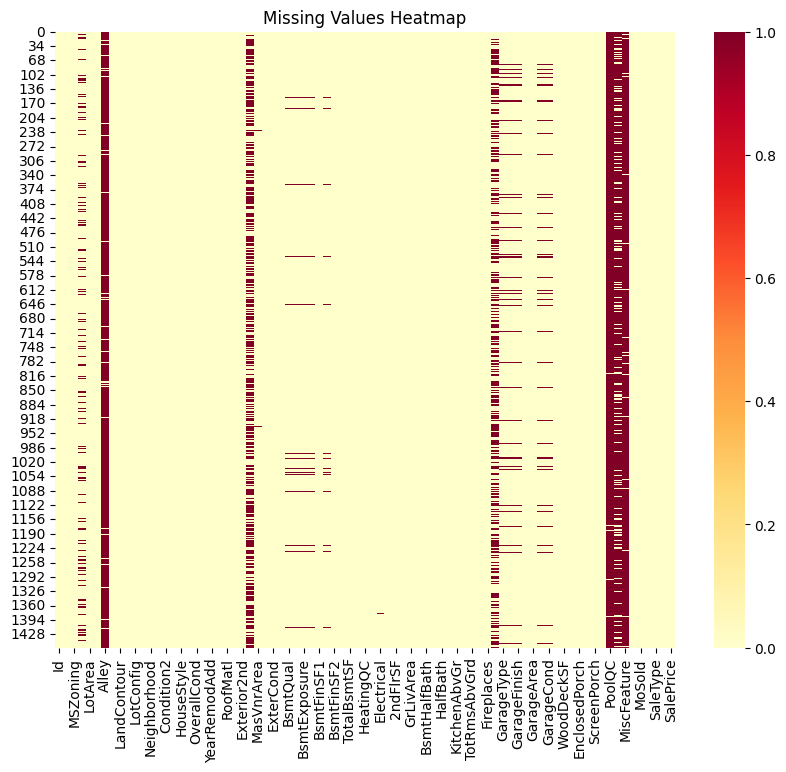

In [3]:
plt.figure(figsize=(10, 8))
# Create the heatmap with modified color and size
sns.heatmap(train.isnull(), cmap="YlOrRd")
plt.title('Missing Values Heatmap')
plt.show()

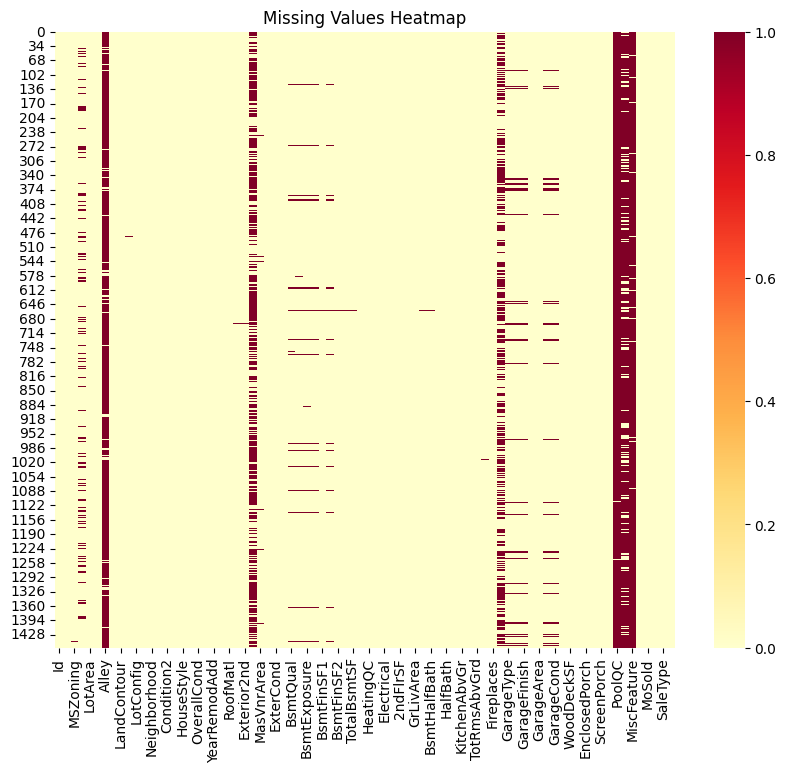

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(test.isnull(), cmap="YlOrRd")
plt.title('Missing Values Heatmap')
plt.show()

In [5]:
missing_train = train.isna().sum() / train.shape[0]
missing_test = test.isna().sum() / test.shape[0]
print(missing_train)
print(missing_test)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64
Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
Length: 80, dtype: float64


In [6]:
train_numeric = train._get_numeric_data()
train_nonnumeric = train.drop(train._get_numeric_data().columns.tolist(), axis=1)
missing_train_numeric = train_numeric.isna().sum() / train_numeric.shape[0]
missing_train_nonnumeric = train_nonnumeric.isna().sum() / train_nonnumeric.shape[0]
print(missing_train_numeric[missing_train_numeric > 0.00].sort_values(ascending=False))
print(missing_train_nonnumeric[missing_train_nonnumeric > 0.00].sort_values(ascending=False))

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
dtype: float64
PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
Electrical      0.000685
dtype: float64


In [7]:
test_numeric = test._get_numeric_data()
test_nonnumeric = test.drop(test._get_numeric_data().columns.tolist(), axis=1)
missing_test_numeric = test_numeric.isna().sum() / test_numeric.shape[0]
missing_test_nonnumeric = test_nonnumeric.isna().sum() / test_nonnumeric.shape[0]
print(missing_test_numeric[missing_test_numeric > 0.00].sort_values(ascending=False))
print(missing_test_nonnumeric[missing_test_nonnumeric > 0.00].sort_values(ascending=False))

LotFrontage     0.155586
GarageYrBlt     0.053461
MasVnrArea      0.010281
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
GarageCars      0.000685
GarageArea      0.000685
dtype: float64
PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
MasVnrType      0.612748
FireplaceQu     0.500343
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MSZoning        0.002742
Functional      0.001371
Utilities       0.001371
KitchenQual     0.000685
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
dtype: float64


<Axes: >

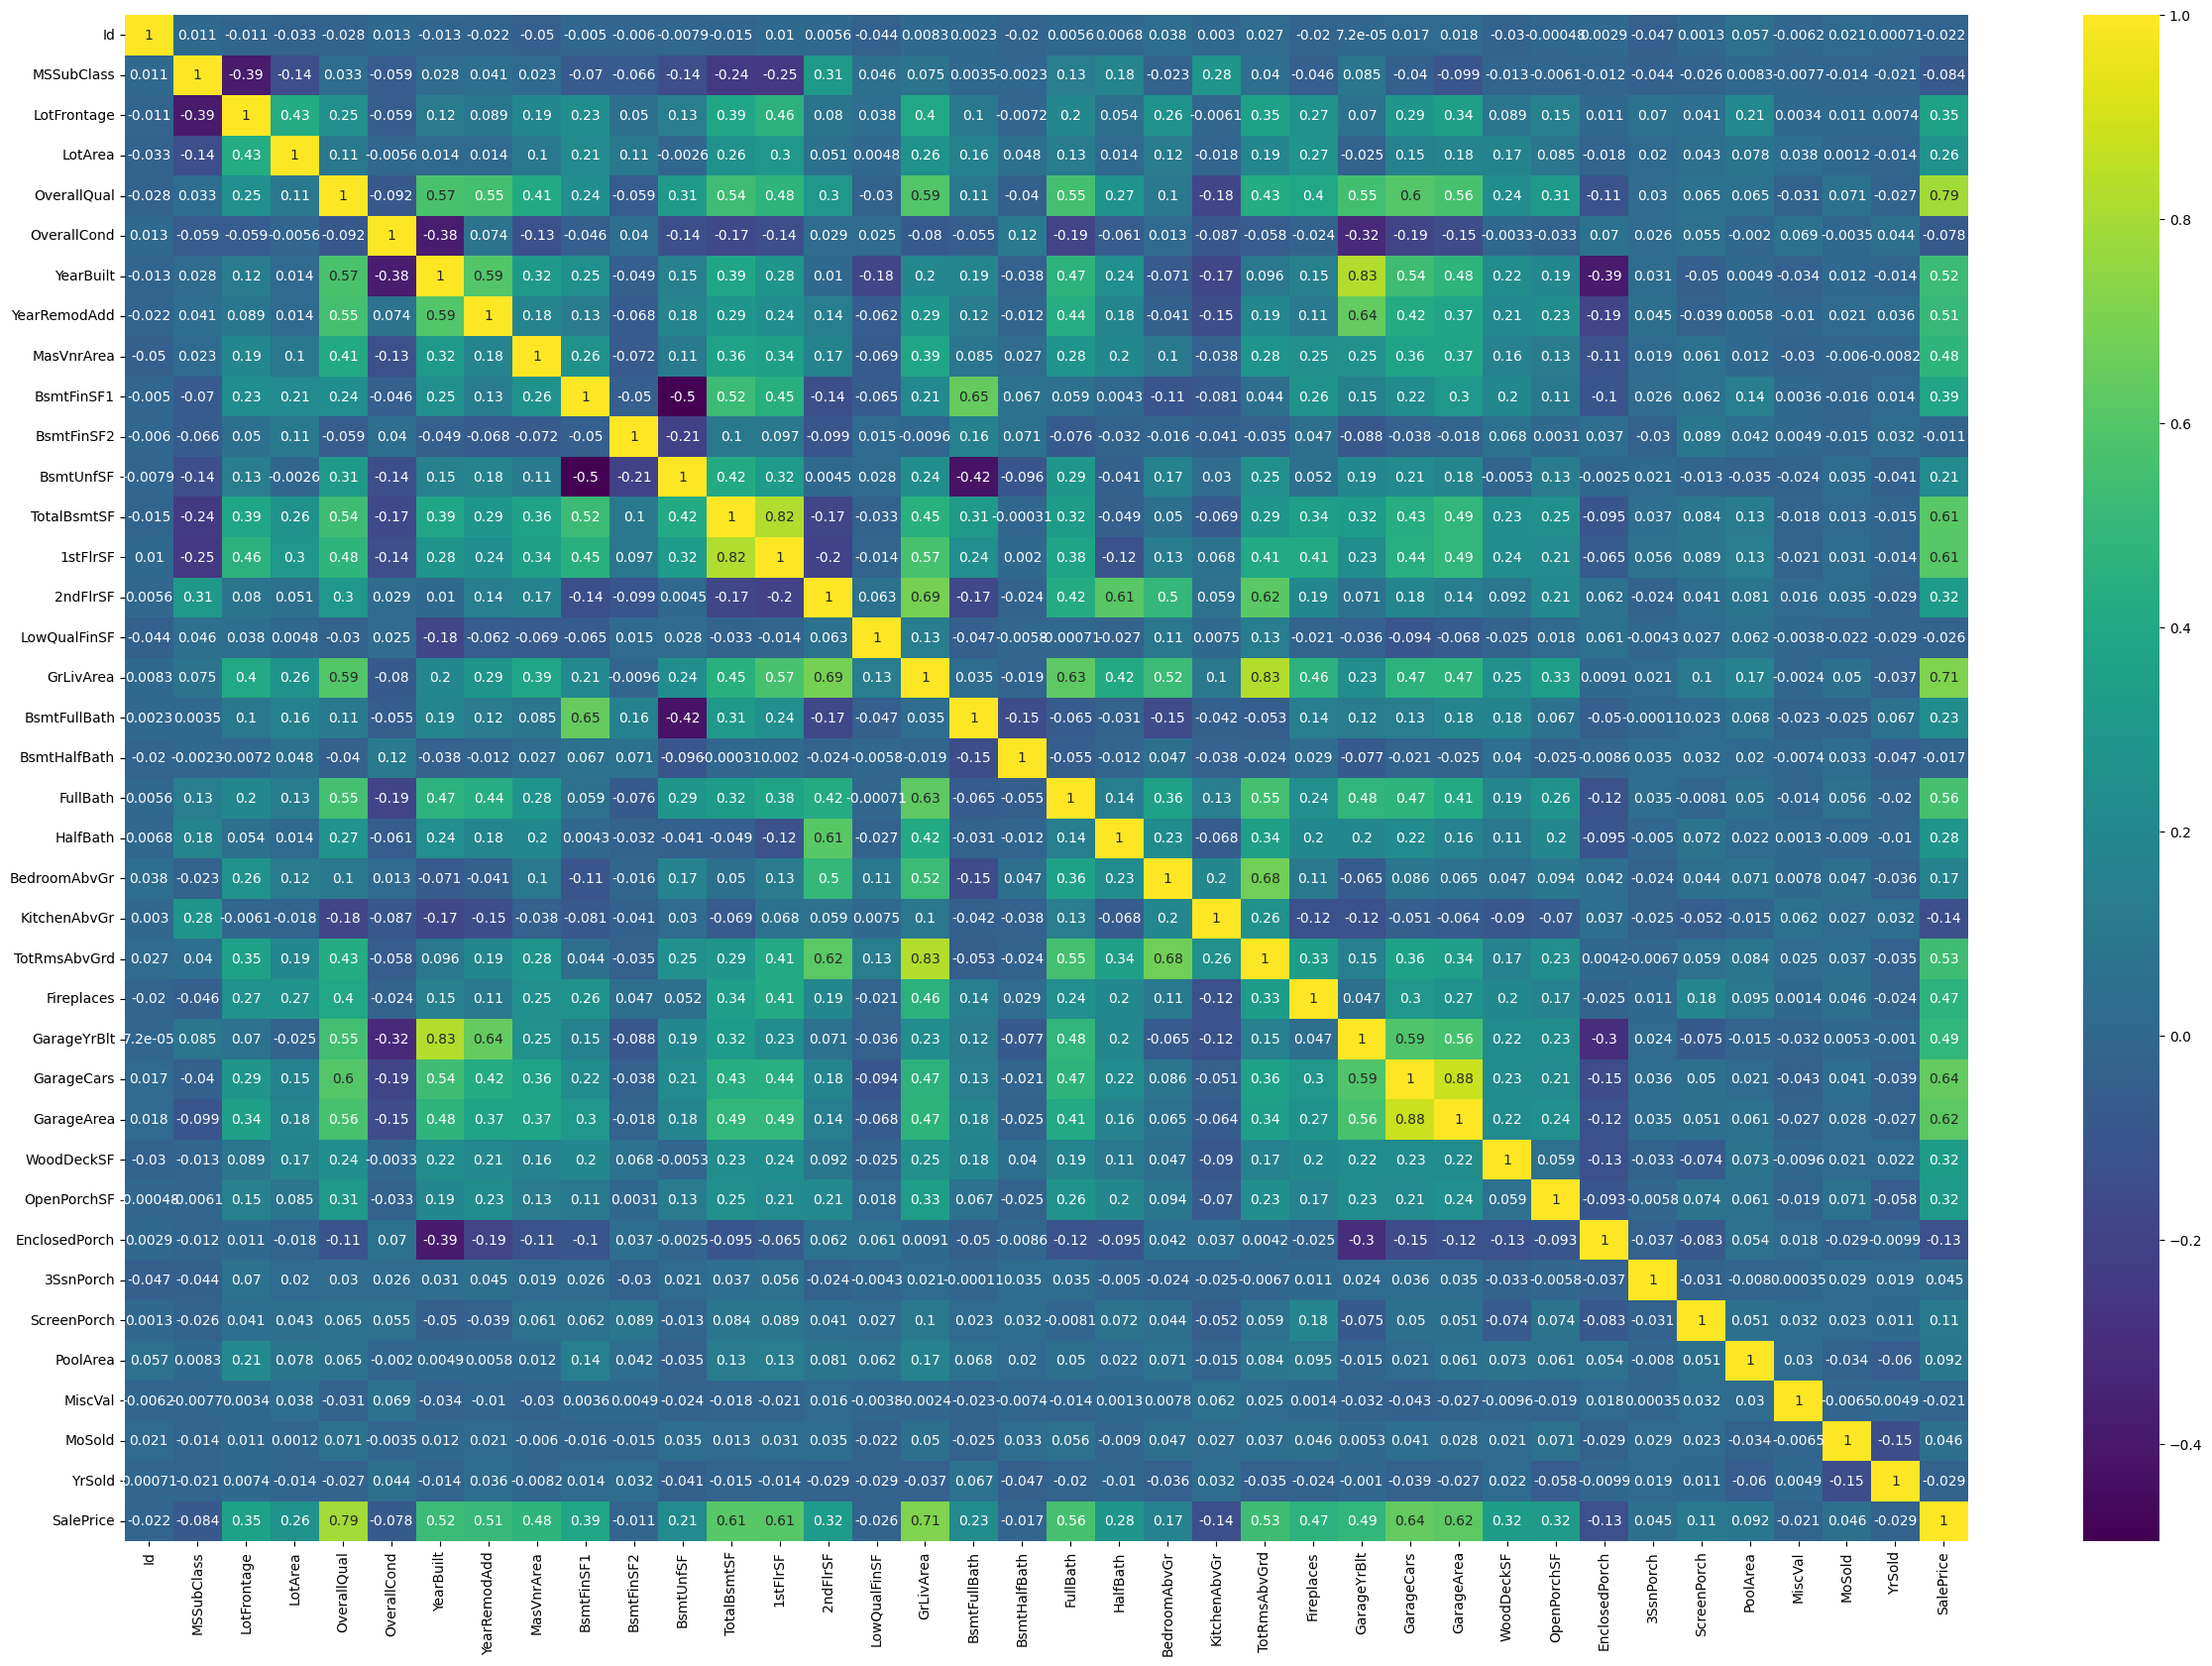

In [8]:
corr = train_numeric.corr()
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corr, cmap="viridis", annot=True)

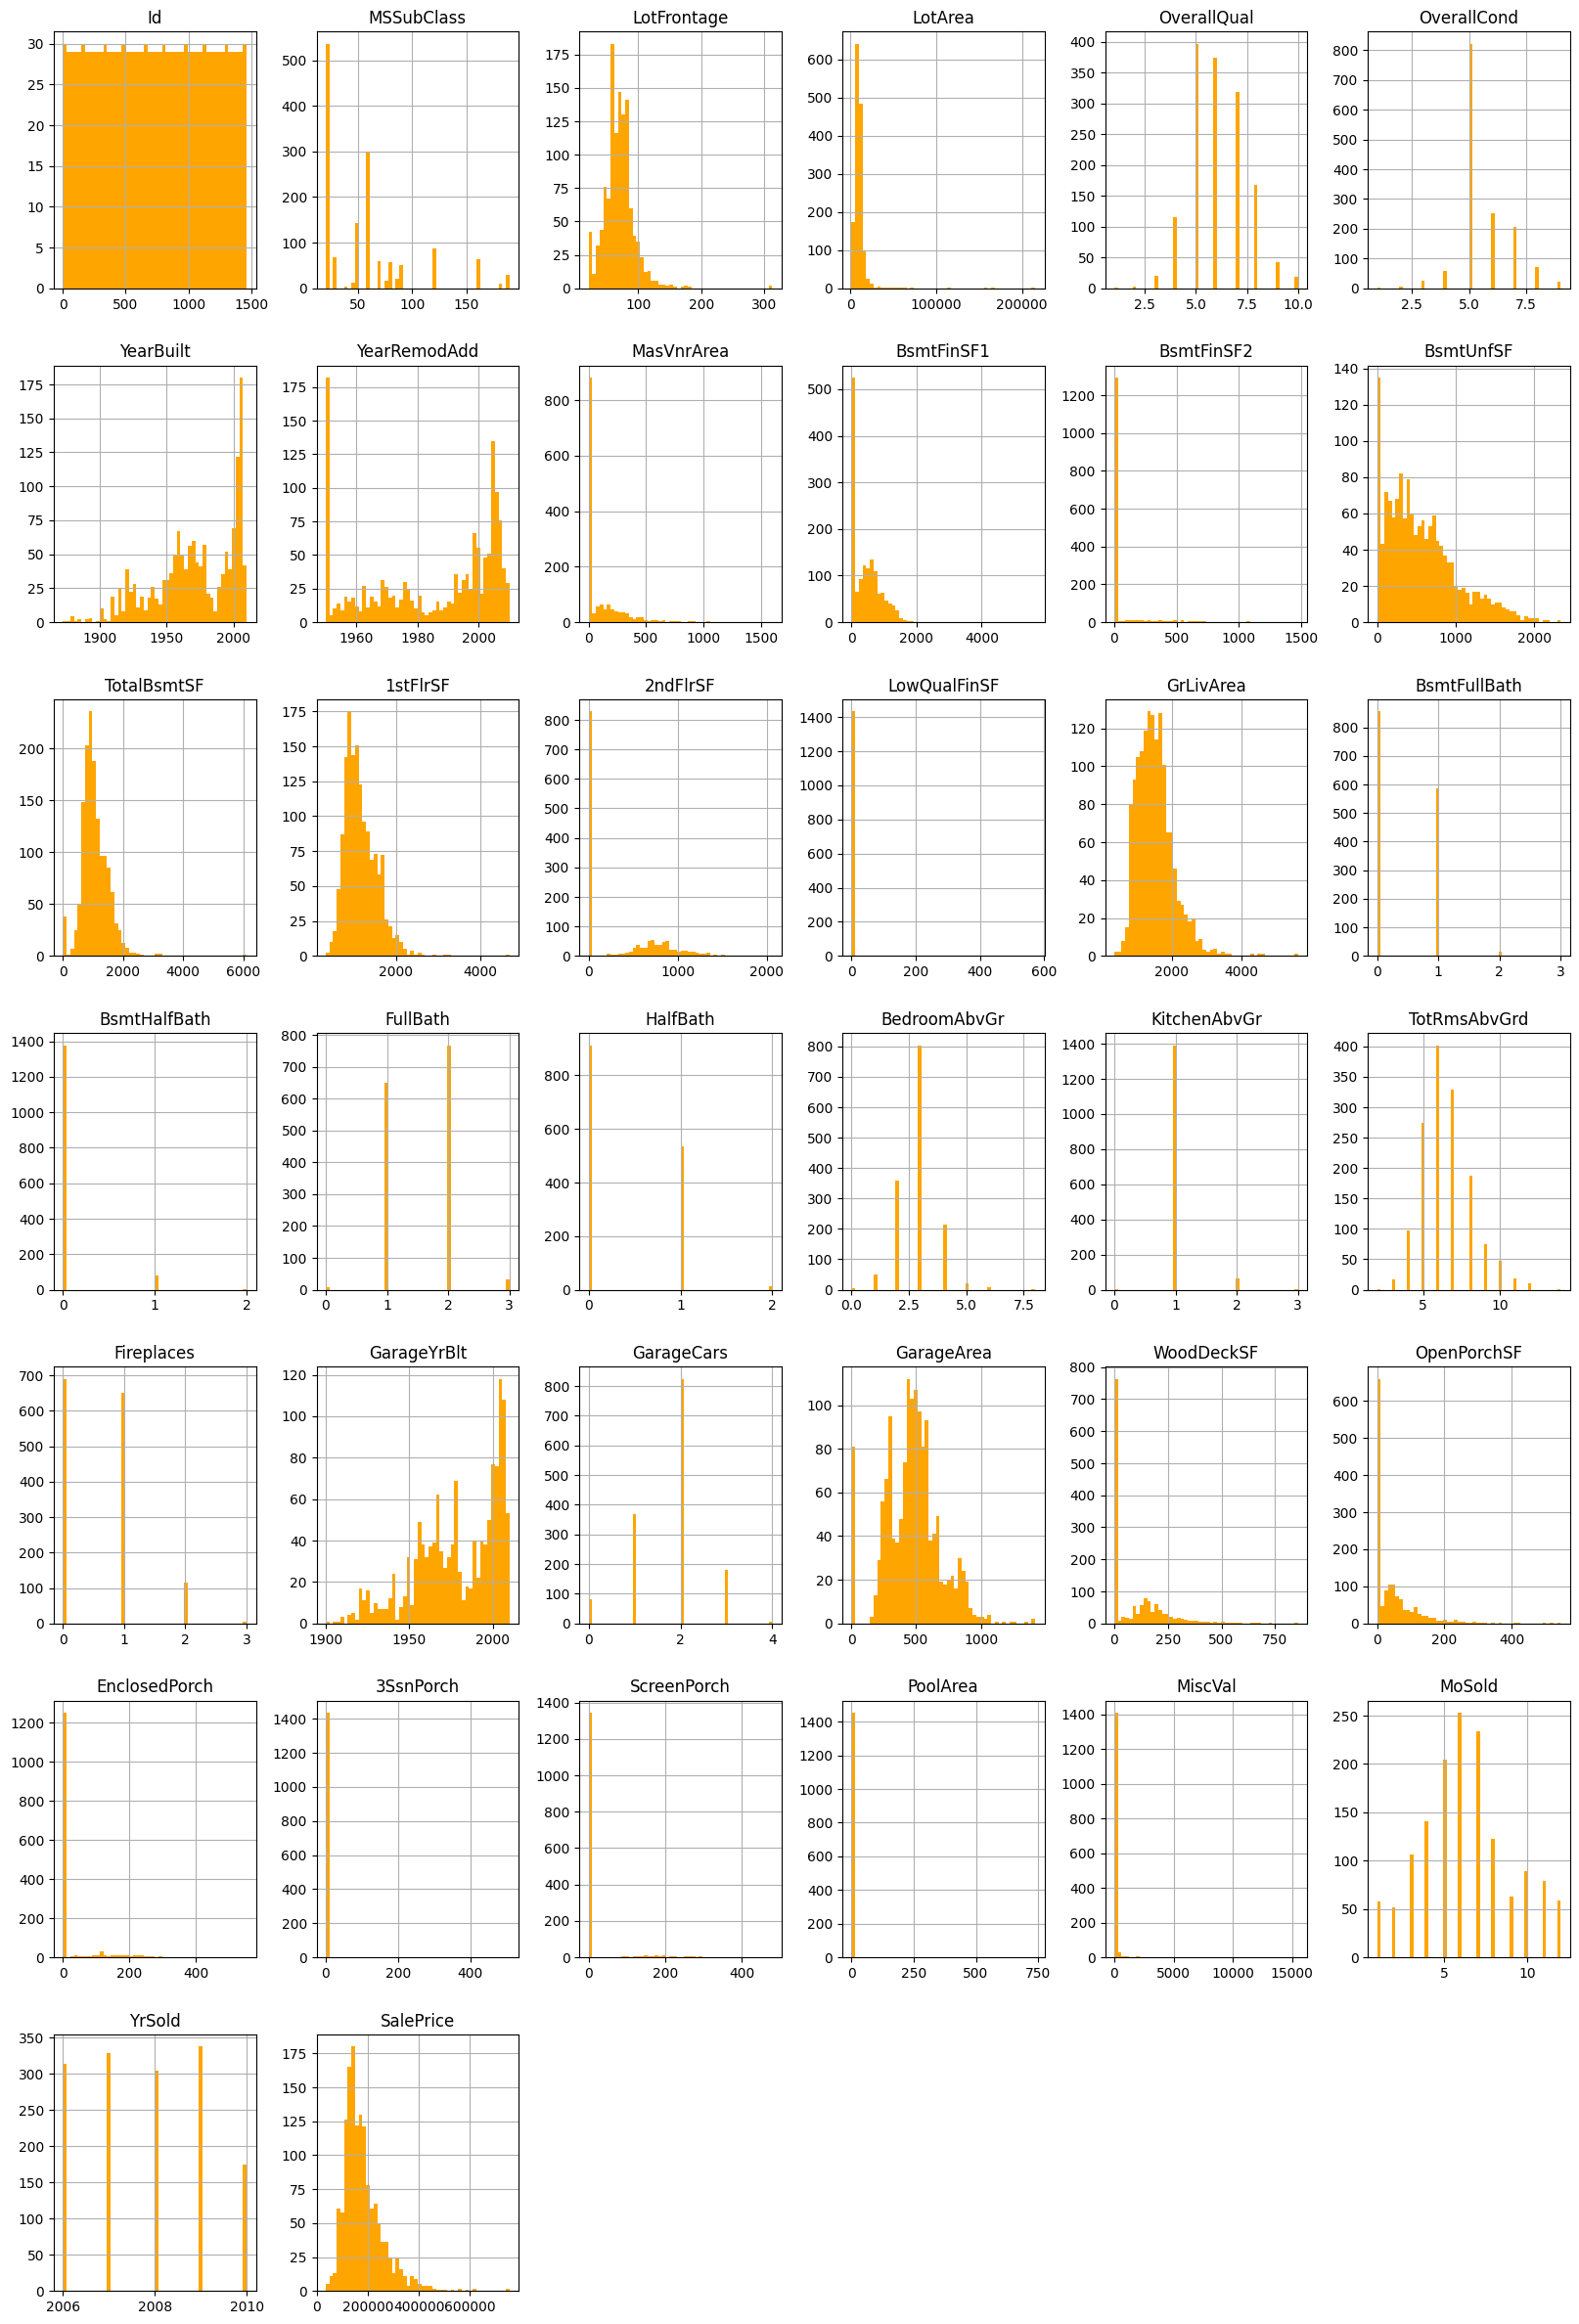

In [9]:
train_numeric.hist(figsize=(20,30), color='orange' ,bins=50, xlabelsize=10, ylabelsize=10);

In [10]:
drop_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'Id']
log_needed_features = ['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']

all_numerical_features = set(train_numeric.columns.tolist()) - set(['Id', 'SalePrice'] + log_needed_features)
numerical_features = list(all_numerical_features - set(['MoSold', 'MSSubClass']))

ordinal_features_reg = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond", "PoolQC"]
ordering = ["Po", "Fa", "TA", "Gd", "Ex"]
ordering_ordinal_reg = [ordering] * len(ordinal_features_reg)

ordinal_features_oth = ["BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Functional"]
ordering_ordinal_oth = [
    ["NA", "No", "Mn", "Av", "Gd"],
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
]

all_categorical_features = set(train_nonnumeric.columns.tolist()) - set(drop_features)
categorical_features = list(all_categorical_features - set(ordinal_features_reg) - set(ordinal_features_oth))
categorical_features.extend(['MoSold', 'MSSubClass'])


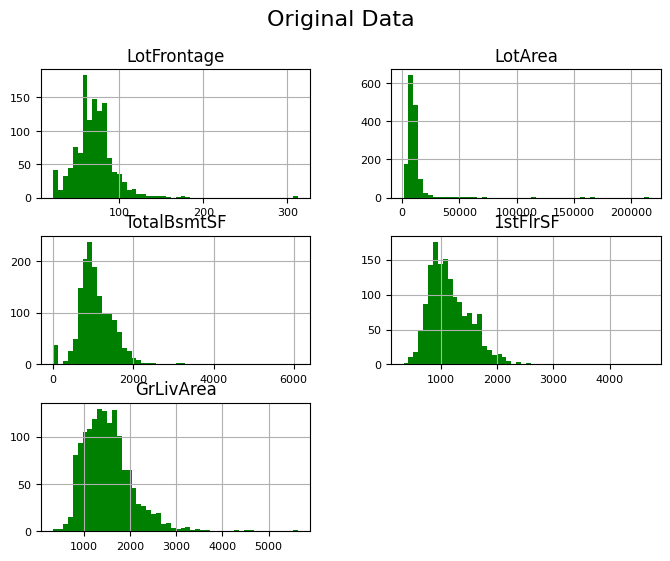

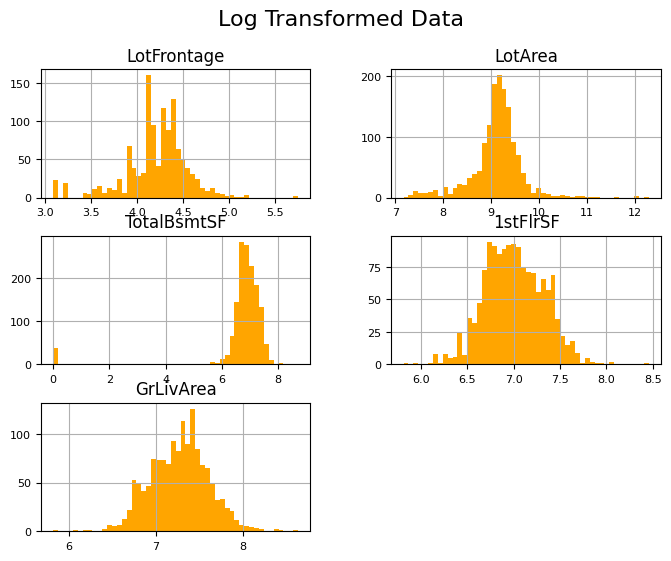

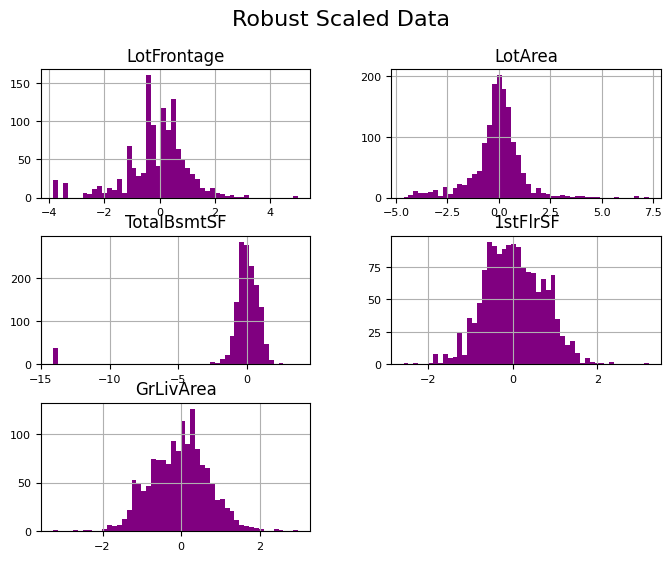

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

def plot_histograms(data, figsize, bins, xlabelsize, ylabelsize, color, title=None):
    data.hist(figsize=figsize, bins=bins, xlabelsize=xlabelsize, ylabelsize=ylabelsize, color=color)
    if title:
        plt.suptitle(title, fontsize=16)
    plt.show()

original_data = train_numeric[log_needed_features]
log_transformed_data = original_data.apply(np.log1p)
robust_scaled_data = RobustScaler().fit_transform(log_transformed_data)
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=log_needed_features)

plot_histograms(original_data, (8, 6), 50, 8, 8, 'green', title='Original Data')
plot_histograms(log_transformed_data, (8, 6), 50, 8, 8, 'orange', title='Log Transformed Data')
plot_histograms(robust_scaled_df, (8, 6), 50, 8, 8, 'purple', title='Robust Scaled Data')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
import graphviz
import xgboost as xgb
import catboost
from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(display='diagram')
import warnings
seed = 123
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [22]:
train_X = train.drop(columns=['SalePrice'])
train_y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.20, random_state= None)
ridge = RidgeCV(alphas = [0.01, 0.1, 1, 10, 30, 100, 200, 300], cv=5)
lasso = LassoCV(alphas = [0.01, 0.1, 1, 10, 30, 100, 200, 300], cv=5)
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
baggingr = BaggingRegressor()
gbr = GradientBoostingRegressor()
xgbr = xgb.XGBRegressor()
catr = catboost.CatBoostRegressor(verbose=100)

In [23]:
numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), 
        StandardScaler()
    )
# PowerTransformer(method='box-cox')
log_transformer = make_pipeline(
    SimpleImputer(strategy="median"), 
    FunctionTransformer(np.log1p, validate=False),
    RobustScaler()
)

ordinal_transformer_reg = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=ordering_ordinal_reg),
)

ordinal_transformer_oth = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=ordering_ordinal_oth),
)

categorical_transformer = make_pipeline(
    SimpleImputer(
        strategy="constant", 
        fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocessor = make_column_transformer(
    ('drop', drop_features),
    (log_transformer, log_needed_features),
    (numeric_transformer, numerical_features),
    (ordinal_transformer_reg, ordinal_features_reg),
    (ordinal_transformer_oth, ordinal_features_oth),
    (categorical_transformer, categorical_features),)

In [24]:
def evaluate_models(models, preprocessor, X_train, y_train, X_test, y_test):
    test_scores = []
    training_scores = []

    for model in models:
        pipeline = make_pipeline(preprocessor, model)
        pipeline.fit(X_train, y_train)
        test_scores.append(mean_squared_error(y_test, pipeline.predict(X_test)))
        training_scores.append(mean_squared_error(y_train, pipeline.predict(X_train)))

    results = pd.DataFrame({'model': [type(model).__name__ for model in models],
                             'training scores': training_scores,
                             'val_score': test_scores}).round(6)
    return results

models = [ridge, lasso, dt, rf, baggingr, gbr, xgbr, catr]
results = evaluate_models(models, preprocessor, X_train, y_train, X_test, y_test)
print(results)

Learning rate set to 0.04196
0:	learn: 79054.7729010	total: 2.36ms	remaining: 2.36s
100:	learn: 21573.1997344	total: 155ms	remaining: 1.38s
200:	learn: 16253.0045421	total: 301ms	remaining: 1.19s
300:	learn: 13727.7918609	total: 446ms	remaining: 1.03s
400:	learn: 11865.6100228	total: 593ms	remaining: 885ms
500:	learn: 10396.7589760	total: 738ms	remaining: 735ms
600:	learn: 9189.4550611	total: 888ms	remaining: 590ms
700:	learn: 8121.0585909	total: 1.04s	remaining: 444ms
800:	learn: 7231.8617569	total: 1.19s	remaining: 296ms
900:	learn: 6536.3909464	total: 1.33s	remaining: 146ms
999:	learn: 5890.8098215	total: 1.48s	remaining: 0us
                       model  training scores     val_score
0                    RidgeCV     5.109147e+08  2.849094e+09
1                    LassoCV     5.310071e+08  2.907644e+09
2      DecisionTreeRegressor     0.000000e+00  3.500105e+09
3      RandomForestRegressor     1.025891e+08  1.875520e+09
4           BaggingRegressor     1.554955e+08  1.803309e+09
5  

335175283.6062607
9611491434.349918


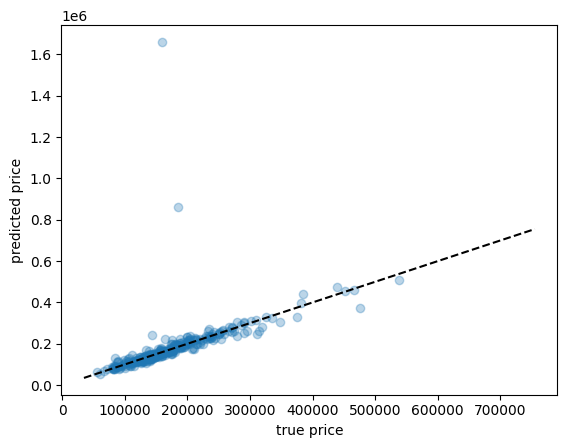

In [25]:
from sklearn.compose import TransformedTargetRegressor

def create_and_evaluate_model(model, preprocessor, X_train, y_train, X_test, y_test):
    ttr = TransformedTargetRegressor(model, func=np.log1p, inverse_func=np.expm1)
    final_model = make_pipeline(preprocessor, ttr)
    final_model.fit(X_train, y_train)
    
    train_mse = mean_squared_error(y_train, final_model.predict(X_train))
    test_mse = mean_squared_error(y_test, final_model.predict(X_test))
    
    return final_model, train_mse, test_mse

def plot_predicted_vs_true(final_model, y_test):
    plt.scatter(y_test, final_model.predict(X_test), alpha=0.3)
    grid = np.linspace(y_train.min(), y_train.max(), 1000)
    plt.plot(grid, grid, "--k")
    plt.xlabel("true price")
    plt.ylabel("predicted price")
    plt.show()

catr = catboost.CatBoostRegressor(verbose=False)
lasso = LassoCV(alphas=[30], cv=5)
ridge = RidgeCV(alphas=[30], cv=5)

final_model, train_mse, test_mse = create_and_evaluate_model(ridge, preprocessor, X_train, y_train, X_test, y_test)
print(train_mse)
print(test_mse)

plot_predicted_vs_true(final_model, y_test)

In [26]:
y_pred = final_model.predict(test)
test['SalePrice'] = y_pred
test['SalePrice'] = test['SalePrice']
final_result = test[['Id', 'SalePrice']]
final_result

,Id,SalePrice
0,1461,116487.060651
1,1462,153938.273732
2,1463,178682.789668
3,1464,193535.991646
4,1465,194100.042501
...,...,...
1454,2915,88147.197949
1455,2916,80501.241191
1456,2917,171107.670440
1457,2918,121897.333060


In [18]:
#final_result.to_csv('/Users/nihal/BACapstone/Part1/fs20.csv', index=False)